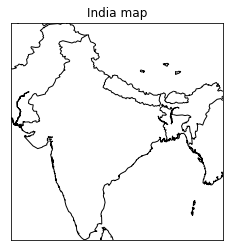

In [1]:
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
m =Basemap(projection='mill',
            llcrnrlat=8,
            llcrnrlon=67,
            urcrnrlat=37,
            urcrnrlon=97,
             resolution='l')
m.drawcoastlines()
m.drawcountries(linewidth=1)
m.drawstates()
# m.fillcontinents()
# m.etopo()
plt.title('India map')
plt.show()

In [29]:
df=pd.read_csv('india-districts-census-2011.csv')
df.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU & KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU & KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU & KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU & KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU & KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [4]:
df1= df[['State name', 'Population', 'Literate']]
df_states = df1.groupby(['State name'])[["Population", "Literate"]].sum()
df_states.head()

,Population,Literate
State name,,
ANDAMAN & NICOBAR ISLANDS,380581,294281
ANDHRA PRADESH,84580777,50556760
ARUNACHAL PRADESH,1383727,766005
ASSAM,31205576,19177977
BIHAR,104099452,52504553


In [1]:
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.tools as tls
tls.set_credentials_file(username='goginenir6', api_key='bg1aLKqWC47SpKFrR6K1')
df=pd.read_csv('india-districts-census-2011.csv')
df1= df[['State name', 'Population', 'Literate']]
df_states = df1.groupby(['State name'], as_index=False)[["Population", "Literate"]].sum()
lit_avg = pd.Series(df_states['Literate']/df_states['Population']*100)
df_states = df_states.assign(lit_avg=lit_avg.values)
# df_order = df_states.sort_values('lit_avg')
df_states['text']= 'Population:'+df_states['Population'].astype(str)+', Litrate:'+df_states['Literate'].astype(str)
df_states['State name']
l = [11.4,17.22, 28.1,26.38, 25.37,30.45,21.25,20.18,20.42,15.11,21.1,28.45,31.06,34.05,23.34,12.58,8.29,10.32,23.25,
     18.59,24.78,25.34,23.72,25.65,28.68,20.76,11.91,30.55,26.91,27.33,13.08,23.5,26.51,30.31,22.34]
n = [92.46,78.29,95.14,92.48,85.09,76.47,81.62,73.01,72.83,74.12,72.5,77.02,77.1,74.47,85.3,77.34,
76.57,72.78,77.41,72.5,93.96,91.53,92.71,90.1,77.22,86.17,79.81,75.51,75.78,88.6,80.27,91.16,80.57,78.03,88.22]
df_states['lat'] = l
df_states['lon'] = n
df_states.head()

,State name,Population,Literate,lit_avg,text,lat,lon
0,ANDAMAN & NICOBAR ISLANDS,380581,294281,77.324144,"Population:380581, Litrate:294281",11.40,92.46
1,ANDHRA PRADESH,84580777,50556760,59.773345,"Population:84580777, Litrate:50556760",17.22,78.29
2,ARUNACHAL PRADESH,1383727,766005,55.358102,"Population:1383727, Litrate:766005",28.10,95.14
3,ASSAM,31205576,19177977,61.456892,"Population:31205576, Litrate:19177977",26.38,92.48
4,BIHAR,104099452,52504553,50.436916,"Population:104099452, Litrate:52504553",25.37,85.09


In [79]:
data=[dict(type='choropleth', autocolorscale=False, locations=df_states['State name'], z=df_states['lit_avg'], locationmode="ISO-3", 
           text=df_states['text'], colorscale='custom-colorscale', colorbar=dict(title='Literature percentage%'))]
# layout = dict(title="Literate rate of india", geo=dict(scope="IND", projection=dict (type='miller'),
#             showlakes=True, lakecolor='rbg(65,165,245)'))
# India=pd.read_csv('india_long_lat.csv', error_bad_lines=False)
# lats, lons = India['lat'], India['long']
layout = layout={"title": "Canadian cities",
        "geo": {"lataxis": {"range": [8.07750807606, 37.050851153400004]},
                "lonaxis": {"range": [68.0307386604, 97.4909535617]},
                "scope": "asia"
    }
}
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='chloropethmap')

/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


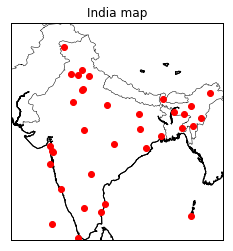

In [5]:
import csv
import numpy as np
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import Polygon
from matplotlib.patches import Polygon

colorVotes = plt.get_cmap('Blues')

df=pd.read_csv('india-districts-census-2011.csv')
df1= df[['State name', 'Population', 'Literate']]
df_states = df1.groupby(['State name'], as_index=False)[["Population", "Literate"]].sum()
lit_avg = pd.Series(df_states['Literate']/df_states['Population']*100)
df_states = df_states.assign(lit_avg=lit_avg.values)


l = [11.4,17.22, 28.1,26.38, 25.37,30.45,21.25,20.18,20.42,15.11,21.1,28.45,31.06,34.05,23.34,12.58,8.29,10.32,23.25,
     18.59,24.78,25.34,23.72,25.65,28.68,20.76,11.91,30.55,26.91,27.33,13.08,23.5,26.51,30.31,22.34]
n = [92.46,78.29,95.14,92.48,85.09,76.47,81.62,73.01,72.83,74.12,72.5,77.02,77.1,74.47,85.3,77.34,
76.57,72.78,77.41,72.5,93.96,91.53,92.71,90.1,77.22,86.17,79.81,75.51,75.78,88.6,80.27,91.16,80.57,78.03,88.22]
df_states['lat'] = l
df_states['lon'] = n


# Cities names and coordinates
cities = df_states['State name']
lat = list(df_states['lat'])
lon = list(df_states['lon'])

m =Basemap(projection='mill',
            llcrnrlat=8,
            llcrnrlon=67,
            urcrnrlat=37,
            urcrnrlon=97,
             resolution='l')
m.drawmapboundary()
# draw the coasts borders and fill the continents
m.drawcoastlines()
m.drawcoastlines()
m.drawcountries()
m.drawstates()
# m.colorbar(location='bottom', label='Mean amplitude (kA)')
# map city coordinates to map coordinates
x, y = m(lon, lat)

# draw a red dot at cities coordinates
plt.plot(x, y, 'ro')

# # for each city,
# for city, xc, yc in zip(cities, x, y):
# # draw the city name in a yellow (shaded) box
#     plt.text(xc+25000, yc-15000, city, bbox=dict(facecolor='yellow', alpha=0.5))
    
    
    
    
# #empty lists for colors and polygons
# colors = []
# patches = []

# for value in lat:
#     seg = cities
#     color = colorVotes(value/float(max(lat)))
#     colors.append(color) # add colors to colors list
#     poly = Polygon(seg, facecolor=color, edgecolor=color)
#     patches.append(poly) #add polygon to patches list
#     m.add_patch(poly)



# plt.colorbar(orientation='vertical')

plt.title('India map')
plt.show()

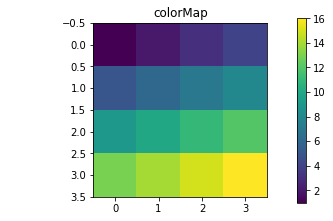

In [6]:
import numpy as np
import matplotlib.pyplot as plt

H = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])  # added some commas and array creation code

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

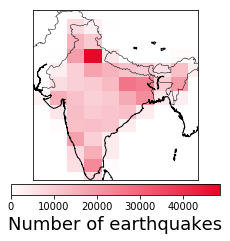

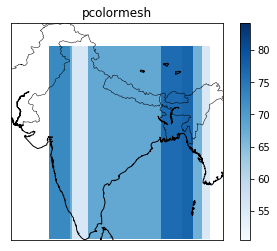

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np


colorVotes = plt.get_cmap('Blues')

df=pd.read_csv('india-districts-census-2011.csv')
df1= df[['State name', 'Population', 'Literate']]
df_states = df1.groupby(['State name'], as_index=False)[["Population", "Literate"]].sum()
lit_avg = pd.Series(df_states['Literate']/df_states['Population']*100)
df_states = df_states.assign(lit_avg=lit_avg.values)


l = [11.4,17.22, 28.1,26.38, 25.37,30.45,21.25,20.18,20.42,15.11,21.1,28.45,31.06,34.05,23.34,12.58,8.29,10.32,23.25,
     18.59,24.78,25.34,23.72,25.65,28.68,20.76,11.91,30.55,26.91,27.33,13.08,23.5,26.51,30.31,22.34]
n = [92.46,78.29,95.14,92.48,85.09,76.47,81.62,73.01,72.83,74.12,72.5,77.02,77.1,74.47,85.3,77.34,
76.57,72.78,77.41,72.5,93.96,91.53,92.71,90.1,77.22,86.17,79.81,75.51,75.78,88.6,80.27,91.16,80.57,78.03,88.22]
df_states['lat'] = l
df_states['lon'] = n


# Cities names and coordinates
cities = df_states['State name']
lat = list(df_states['lat'])
lon = list(df_states['lon'])

def setup_map(ax):
    m =Basemap(projection='mill',
                llcrnrlat=8,
                llcrnrlon=67,
                urcrnrlat=37,
                urcrnrlon=97,
                resolution='l',
                fix_aspect=True,
                ax=ax)
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    return(m)

# create pseudo-data with longitudes and latitudes
# lon, lat = np.meshgrid(np.arange(-90, 180), 
#                        np.arange(90, -90, -2))

lons, lats = np.meshgrid(lon,lat)

# lon, lat = np.meshgrid(np.array(l), np.array(n))

# data = np.random.rand(*lon.shape) * 100
# data = np.repeat(df_states['lit_avg'], [1, 34], axis=0)
data, data1 =np.meshgrid(np.array(df_states['lit_avg']), 
                       np.array(df_states['lit_avg']))

# two-panel figure
fig, ax = plt.subplots()

# plot pseudodata in left panel using pcolormesh
m0 = setup_map(ax)
cm = m0.pcolormesh(lons, lats, data, latlon=True, vmin= min(df_states['lit_avg']), 
                   vmax=max(df_states['lit_avg']), cmap=plt.cm.get_cmap("Blues"))
# min(df_states['lit_avg'])
# max(df_states['lit_avg'])
plt.colorbar(cm, ax=ax)
ax.set_title('pcolormesh')



plt.show()

In [4]:

import csv
import numpy as np
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# load earthquake epicenters:
# http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv
India=pd.read_csv('india_long_lat.csv', error_bad_lines=False)
lats, lons = India['lat'], India['long']
m =Basemap(projection='mill',
            llcrnrlat=8,
            llcrnrlon=67,
            urcrnrlat=37,
            urcrnrlon=97,
             resolution='l')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
 

    
# ######################################################################
# bin the epicenters (adapted from 
# http://stackoverflow.com/questions/11507575/basemap-and-density-plots)

# compute appropriate bins to chop up the data:
db = 1 # bin padding
lon_bins = np.linspace(min(lons)-db, max(lons)+db, 10+1) # 10 bins
lat_bins = np.linspace(min(lats)-db, max(lats)+db, 13+1) # 13 bins
    
density, _, _ = np.histogram2d(lats, lons, [lat_bins, lon_bins])

# Turn the lon/lat of the bins into 2 dimensional arrays ready
# for conversion into projected coordinates
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

# convert the bin mesh to map coordinates:
xs, ys = m(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh
# ######################################################################



# define custom colormap, white -> nicered, #E6072A = RGB(0.9,0.03,0.16)
cdict = {'red':  ( (0.0,  1.0,  1.0),
                   (1.0,  0.9,  1.0) ),
         'green':( (0.0,  1.0,  1.0),
                   (1.0,  0.03, 0.0) ),
         'blue': ( (0.0,  1.0,  1.0),
                   (1.0,  0.16, 0.0) ) }
custom_map = LinearSegmentedColormap('custom_map', cdict)
plt.register_cmap(cmap=custom_map)


# add histogram squares and a corresponding colorbar to the map:
plt.pcolormesh(xs, ys, density, cmap="custom_map")

cbar = plt.colorbar(orientation='horizontal', shrink=0.625, aspect=20, fraction=0.2,pad=0.02)
cbar.set_label('Number of earthquakes',size=18)
#plt.clim([0,100])


# translucent blue scatter plot of epicenters above histogram:    
x,y = m(lons, lats)
m.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='#424FA4',markeredgecolor="none", alpha=0.33)
 
    
# http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawmapscale
m.drawmapscale(-119-6, 37-7.2, -119-6, 37-7.2, 500, barstyle='fancy', yoffset=20000)
    
    
# make image bigger:
plt.gcf().set_size_inches(15,15)

plt.show()

RuntimeError: 

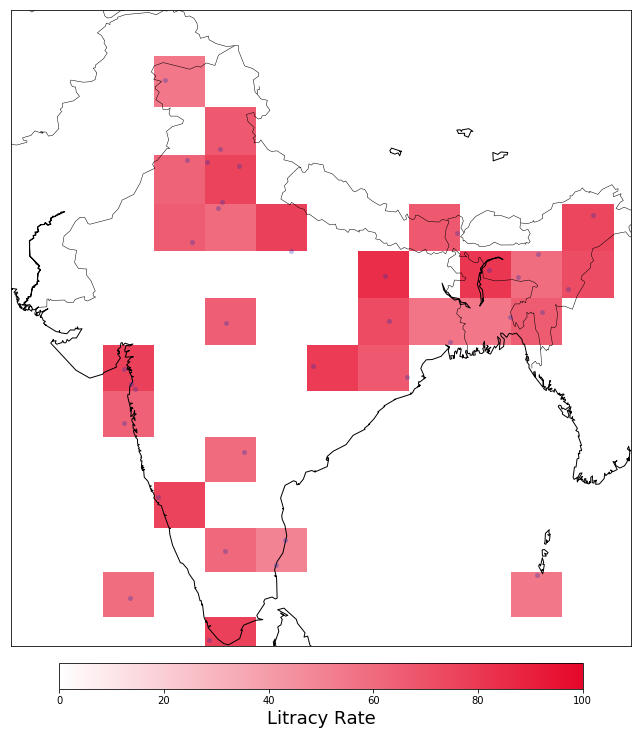

In [70]:

import csv
import numpy as np
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


df=pd.read_csv('india-districts-census-2011.csv')
df1= df[['State name', 'Population', 'Literate']]
df_states = df1.groupby(['State name'], as_index=False)[["Population", "Literate"]].sum()
lit_avg = pd.Series(df_states['Literate']/df_states['Population']*100)
df_states = df_states.assign(lit_avg=lit_avg.values)


l = [11.4,17.22, 28.1,26.38, 25.37,30.45,21.25,20.18,20.42,15.11,21.1,28.45,31.06,34.05,23.34,12.58,8.29,10.32,23.25,
     18.59,24.78,25.34,23.72,25.65,28.68,20.76,11.91,30.55,26.91,27.33,13.08,23.5,26.51,30.31,22.34]
n = [92.46,78.29,95.14,92.48,85.09,76.47,81.62,73.01,72.83,74.12,72.5,77.02,77.1,74.47,85.3,77.34,
76.57,72.78,77.41,72.5,93.96,91.53,92.71,90.1,77.22,86.17,79.81,75.51,75.78,88.6,80.27,91.16,80.57,78.03,88.22]
lats, lons = l, n
m =Basemap(projection='mill',
            llcrnrlat=8,
            llcrnrlon=67,
            urcrnrlat=37,
            urcrnrlon=97,
             resolution='l')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
 

    
# ######################################################################
# bin the epicenters (adapted from 
# http://stackoverflow.com/questions/11507575/basemap-and-density-plots)

# compute appropriate bins to chop up the data:
db = 1 # bin padding
lon_bins = np.linspace(min(lons)-db, max(lons)+db, 10+1) # 10 bins
lat_bins = np.linspace(min(lats)-db, max(lats)+db, 13+1) # 13 bins
    
density, _, _ = np.histogram2d(lats, lons, [lat_bins, lon_bins])
i= 0
for row in range(len(density)):
    for col in range(len(density[row])):
        if density[row][col] >0:
            density[row][col] = int(df_states['lit_avg'][i])
            i += 1
# density
# density  =np.array([[77.324144, 59.773345, 55.358102, 61.456892, 50.436916], 
#           [76.312284, 60.206705, 64.947383, 77.454604, 79.907511],
#           [67.990681, 65.475466, 73.416288, 56.351669, 55.559581],
#           [66.531016, 84.223710, 81.511641, 59.001861, 72.573770],
#           [66.828210, 60.164199,77.303168, 67.851031,75.874504],
#           [63.711955, 76.710341, 67.429294,55.836841, 72.874019],
#           [71.849814, 76.343124,57.252497, 68.220839, 67.419917] ])


# Turn the lon/lat of the bins into 2 dimensional arrays ready
# for conversion into projected coordinates
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

# convert the bin mesh to map coordinates:
xs, ys = m(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh
# ######################################################################

# nnp=np.array(df_states['lit_avg'])
# nnp.shape= (7,5)
# nnp

# define custom colormap, white -> nicered, #E6072A = RGB(0.9,0.03,0.16)
cdict = {'red':  ( (0.0,  1.0,  1.0),
                   (1.0,  0.9,  1.0) ),
         'green':( (0.0,  1.0,  1.0),
                   (1.0,  0.03, 0.0) ),
         'blue': ( (0.0,  1.0,  1.0),
                   (1.0,  0.16, 0.0) ) }
custom_map = LinearSegmentedColormap('custom_map', cdict)
plt.register_cmap(cmap=custom_map)


# add histogram squares and a corresponding colorbar to the map:
plt.pcolormesh(xs, ys, density, cmap="custom_map")

cbar = plt.colorbar(orientation='horizontal', shrink=0.625, aspect=20, fraction=0.2,pad=0.02)
cbar.set_label('Litracy Rate',size=18)
plt.clim([0,100])


# translucent blue scatter plot of epicenters above histogram:    
x,y = m(lons, lats)
m.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='#1b2fad',markeredgecolor="none", alpha=0.3)
 
    
# http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawmapscale
# m.drawmapscale(-119-6, 37-7.2, -119-6, 37-7.2, 500, barstyle='fancy', yoffset=20000)
    
    
# make image bigger:
plt.gcf().set_size_inches(15,15)

plt.show()